### Bank Term Deposit Subscription

**About dataset:**The dataset is from a bank, using which we have to predict whether the subject subscribes to a term deposit or not.<br/>

**Attributes:**
The dataset has the following attributes:<br/>
1  - age (numeric)<br/>
2  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services"). <br/>
3  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br/>
4  - education (categorical: "unknown","secondary","primary","tertiary")<br/>
5  - default: has credit in default? (binary: "yes","no")<br/>
6  - balance: average yearly balance, in euros (numeric) <br/>
7  - housing: has housing loan? (binary: "yes","no")<br/>
8  - loan: has personal loan? (binary: "yes","no")<br/>
9  - contact: contact communication type (categorical: "unknown","telephone","cellular") <br/>
10 - day: last contact day of the month (numeric)<br/>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br/>
12 - duration: last contact duration, in seconds (numeric)<br/>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client      was not previously contacted)<br/>  
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br/>
**Response Variable (desired target):**<br/>
17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

**Importing packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'C:\\Users\\karthikeya\\Desktop\\Machine Learning\\LogisticRegression\\Git'

In [2]:
bank_data = pd.read_csv("bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Top 5 rows of dataset

**Let's see the datatypes of the variables**

In [3]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank_data.info()
#Type of all columns in the data frame and the total no. of entries in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


**Observations:** <br/>
No. of rows: 4521, No.of columns: 17
        

###  Perform Descriptive Statistics on the dataset

In [5]:
bank_data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


###  Remove missing values from the data frame if any

In [6]:
bank_data.isnull().any()
# All columns have valid data and there is no missing value in the dataFrame.

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

###  Perform EDA and find any correlation

In [7]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [9]:
bank_data.shape

(4521, 17)

In [10]:
correlation = bank_data.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


Plot the correlation

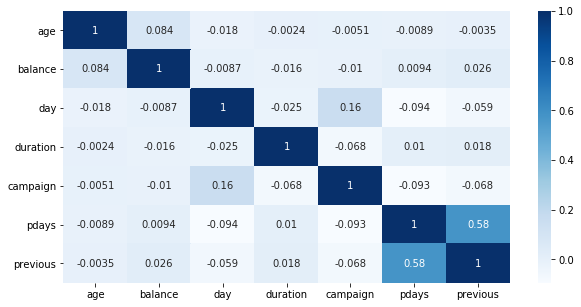

In [11]:
plt.subplots(figsize=(10,5))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.show()

In [12]:
#Since pdays & previous are highly correlated we can drop these columns frm the data frame

In [13]:
bank_data.drop(['pdays', 'previous'], axis=1, inplace=True)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(5), object(10)
memory usage: 529.9+ KB


###  Perform classification using Logistic Regression and analyse the metrics

Convert categorical columns to the numerical type using dummy coding. Perform feature engineering now.

In [14]:
from sklearn.preprocessing import LabelEncoder
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','day','month','y']
bank_data[encoding_list] = bank_data[encoding_list].apply(LabelEncoder().fit_transform)

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,18,10,79,1,3,0
1,33,7,1,1,0,4789,1,1,0,10,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,15,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,2,2,6,199,4,3,0
4,59,1,1,1,0,0,1,0,2,4,8,226,1,3,0


### Step 1 : Splitting features and label

In [15]:
X = bank_data.drop('y', axis=1)
Y = bank_data['y']

print(X.shape)
print(Y.shape)

(4521, 14)
(4521,)


### Step 2 : Split train and test data

In [16]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 14)
(1131, 14)
(3390,)
(1131,)


### Step 3 : Create an instance of the model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

### Step 4 : Fit the model on the training data

In [19]:
logreg.fit(x_train, y_train)

C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Step 5 : Predict the value using test data

In [20]:
y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

### Step 6 : Use metrics to evaluate the model performance 

Since its a classification problem we cannot use regression metrics like MAE, MSE etc. We use confusion matrix, accuracy score, precision and recall for model evaluation

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
confusion_matrix

array([[966,  22],
       [114,  29]], dtype=int64)

In [22]:
print("Test accuracy :", metrics.accuracy_score(y_test, y_pred_test))
print("Train accuracy :", metrics.accuracy_score(y_train, y_pred_train))

Test accuracy : 0.8797524314765695
Train accuracy : 0.8952802359882006


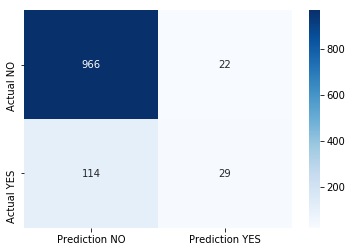

In [23]:
sns.heatmap(confusion_matrix, cmap='Blues', xticklabels=['Prediction NO', 'Prediction YES'], yticklabels=['Actual NO', 'Actual YES'], fmt='d', annot=True)

According to the model 51 people will take term deposit and 1080 people won't take term deposit

Now find precison(wrt model) and recall(wrt to reality) 

Classification report 

In [24]:
classification_report = metrics.classification_report(y_test, y_pred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       988
           1       0.57      0.20      0.30       143

   micro avg       0.88      0.88      0.88      1131
   macro avg       0.73      0.59      0.62      1131
weighted avg       0.85      0.88      0.85      1131

